# Основные проблемы МО

### 1. Недостаточный размер обучающих данных

Пусть данные подчиняются линейному закону $y(x) = 4x + 2$, и в процессе измерения происходит ошибка $\xi$ имеющая нормальное распределение $\widetilde{y}=y+\xi$. Сгенерируем данные (точки) в размере 100, для первого обучения будем использовать все данные, а для второго -- только 10 точек . Сравним результаты.

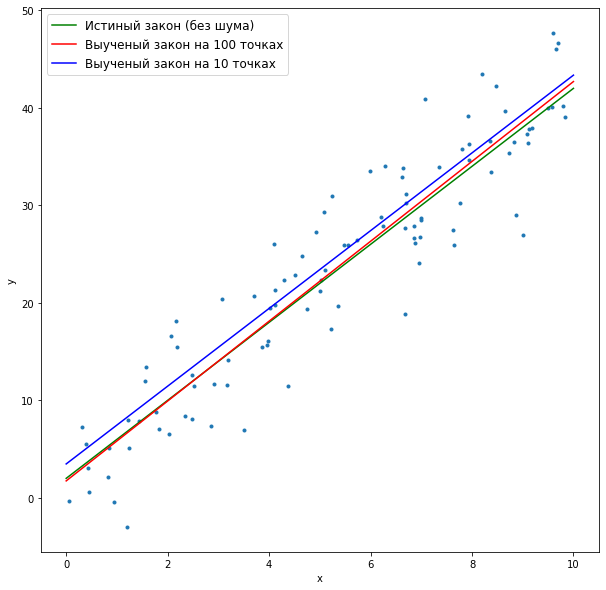

In [ ]:
from matplotlib import pyplot as plt
import numpy as np  

real_a = 4
real_b = 2

X = 10*np.random.rand(100,1)
y = real_a*X + real_b + np.random.randn(100,1)*4

x_for_line = np.array([0,10])
true_line = real_a*x_for_line + real_b

X_b = np.c_[np.ones((100, 1)), X]

theta_pred_1 = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
pred_line_1 = theta_pred_1[1]*x_for_line + theta_pred_1[0]

shuffled_indices = np.random.permutation(X.shape[0])[:10]

X_b_2 = X_b[shuffled_indices]
y_2 = y[shuffled_indices]

theta_pred_2 = np.linalg.inv(X_b_2.T.dot(X_b_2)).dot(X_b_2.T).dot(y_2)
pred_line_2 = theta_pred_2[1]*x_for_line + theta_pred_2[0]

fig = plt.figure(figsize=(10,10))
plt.plot(X,y, '.')
plt.plot(x_for_line, true_line, 'g-', label='Истиный закон (без шума)')
plt.plot(x_for_line, pred_line_1, 'r-', label='Выученый закон на 100 точках')
plt.plot(x_for_line, pred_line_2, 'b-', label='Выученый закон на 10 точках')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 2. Нерепрезентативные обучающие данные

 - 2.1. Зашумленность данных или шум выборки или большое число выбросов (аномалий);
 - 2.2. Смещенность выборки.

Для случая 2.1 вновь рассмотрим данные с линейным законом $y(x) = 4x + 2$. Пусть в нашей выборке еще существуют данные с другим линейным законом $y(x) = -4x + 2$, пусть таких данных будет немного в выборке (порядка 10%), посмотрим как обучится наша линейная модель с наличием таких выбросов (outliers, anomalies) и без них (на фильтрованных от выборосах 90% оставшихся данных).

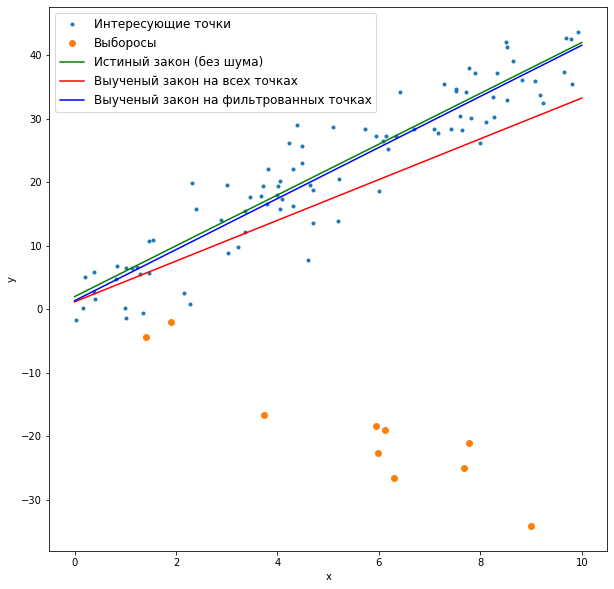

In [ ]:
real_a = 4
real_a_outlier = -4
real_b = 2

X = 10*np.random.rand(90,1)
y = real_a*X + real_b + np.random.randn(90,1)*4

x_for_line = np.array([0,10])
true_line = real_a*x_for_line + real_b

X_outliers = 10*np.random.rand(10,1)
y_outliers = real_a_outlier*X_outliers + real_b + np.random.randn(10,1)*4

X_full = np.concatenate([X, X_outliers])
y_full = np.concatenate([y, y_outliers])

X_b_full = np.c_[np.ones((100, 1)), X_full]
X_b_filtered = np.c_[np.ones((90, 1)), X]

theta_pred_full = np.linalg.inv(X_b_full.T.dot(X_b_full)).dot(X_b_full.T).dot(y_full)
pred_line_full = theta_pred_full[1]*x_for_line + theta_pred_full[0]

theta_pred_filtered = np.linalg.inv(X_b_filtered.T.dot(X_b_filtered)).dot(X_b_filtered.T).dot(y)
pred_line_filtered = theta_pred_filtered[1]*x_for_line + theta_pred_filtered[0]

fig = plt.figure(figsize=(10,10))
plt.plot(X,y, '.', label='Интересующие точки')
plt.plot(X_outliers,y_outliers, 'o', label='Выборосы')
plt.plot(x_for_line, true_line, 'g-', label='Истиный закон (без шума)')
plt.plot(x_for_line, pred_line_full, 'r-', label='Выученый закон на всех точках')
plt.plot(x_for_line, pred_line_filtered, 'b-', label='Выученый закон на фильтрованных точках')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left", fontsize=12)
plt.show()

Для случая 2.2 рассмотрим данные, подчиняющиеся закону вида $y(x) = 5x^3 - 2x^2 + 10$. В этот раз возьмем датасет в 2 раза больше, чем в предыдущих примерах. Данные будут зашумлены аналогичным образом. Построим полиномиальную регрессию на всех точках, и только для точек, где $x>0$ (смещение выборки или sampling bias). Сравним результаты.

[ 14.2839693  -12.90830124   9.4416733    4.04903409]


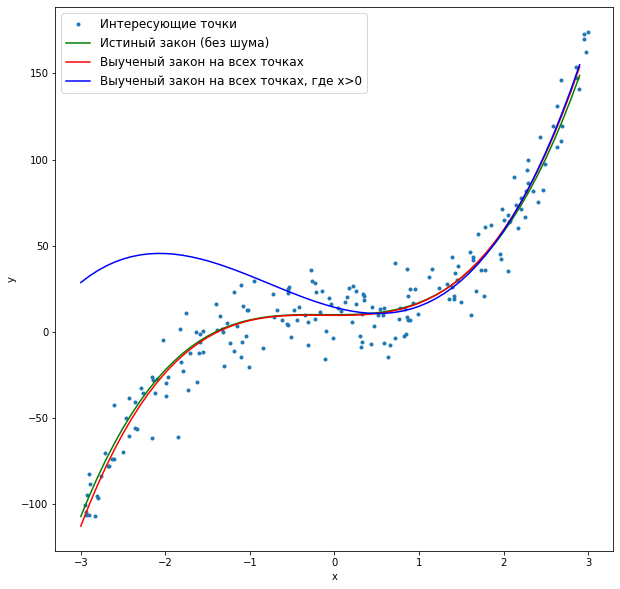

In [ ]:
m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 5 * X**3 + 2 * X**2 + 10 + np.random.randn(m, 1)*12

X_poly = np.c_[np.ones((m, 1)), X, X**2, X**3]

x_for_poly = np.arange(-3,3,0.1)
true_poly = 5 * x_for_poly**3 + 2 * x_for_poly**2 + 10

theta_pred = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
theta_pred = (theta_pred.T)[0]
pred_poly = theta_pred[0] + theta_pred[1]*x_for_poly + theta_pred[2]*x_for_poly**2 + theta_pred[3]*x_for_poly**3

X_r = X[X > 0]
y_r = y[X > 0]
X_poly_r = np.c_[np.ones((X_r.shape[0], 1)), X_r, X_r**2, X_r**3]

theta_pred_r = np.linalg.inv(X_poly_r.T.dot(X_poly_r)).dot(X_poly_r.T).dot(y_r)
print(theta_pred_r)
#theta_pred_r = (theta_pred_r.T)[0]
pred_poly_r = theta_pred_r[0] + theta_pred_r[1]*x_for_poly + theta_pred_r[2]*x_for_poly**2 + theta_pred_r[3]*x_for_poly**3

fig = plt.figure(figsize=(10,10))
plt.plot(X,y, '.', label='Интересующие точки')
plt.plot(x_for_poly, true_poly, 'g-', label='Истиный закон (без шума)')
plt.plot(x_for_poly, pred_poly, 'r-', label='Выученый закон на всех точках')
plt.plot(x_for_poly, pred_poly_r, 'b-', label='Выученый закон на всех точках, где x>0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 3. Данные плохого качества

- Ошибка в разметке, сборе данных, недостающая информация (отсуствие некоторого признака у набора точек из датасета);
- Слишком много выбросов;
- Шум в данных составляет большую часть информации, например

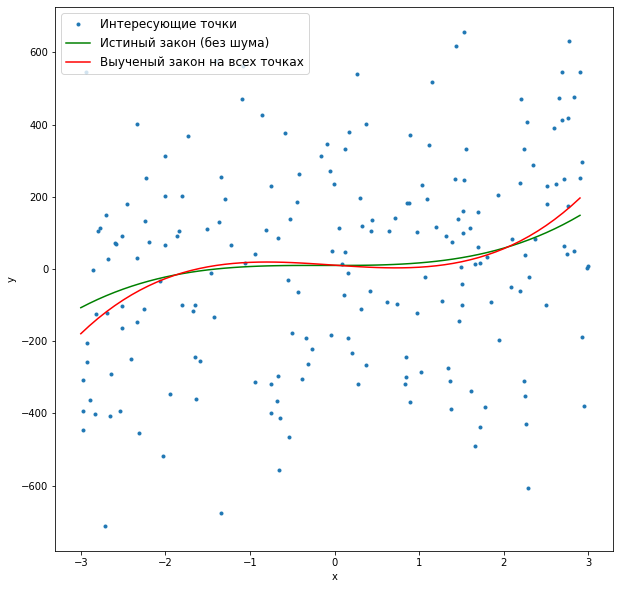

In [ ]:
m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 5 * X**3 + 2 * X**2 + 10 + np.random.randn(m, 1)*260

X_poly = np.c_[np.ones((m, 1)), X, X**2, X**3]

x_for_poly = np.arange(-3,3,0.1)
true_poly = 5 * x_for_poly**3 + 2 * x_for_poly**2 + 10

theta_pred = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
theta_pred = (theta_pred.T)[0]
pred_poly = theta_pred[0] + theta_pred[1]*x_for_poly + theta_pred[2]*x_for_poly**2 + theta_pred[3]*x_for_poly**3

fig = plt.figure(figsize=(10,10))
plt.plot(X,y, '.', label='Интересующие точки')
plt.plot(x_for_poly, true_poly, 'g-', label='Истиный закон (без шума)')
plt.plot(x_for_poly, pred_poly, 'r-', label='Выученый закон на всех точках')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 4. Несущественные признаки

В рамках описывающих набор данных признаков физически не возможно обучить систему с требуемым качеством работы. 

Конструирование признаков:

  - выбор признаков (feature selection);
  - выделение признаков (feature extraction);
  - сбор дополнительных признаков.

### 5. Недообучение (underfitting)

Модель не обладает достаточностью мощностью (информационной вместительностью, числом свободных параметров), чтобы описать данные с требуемой точностью.

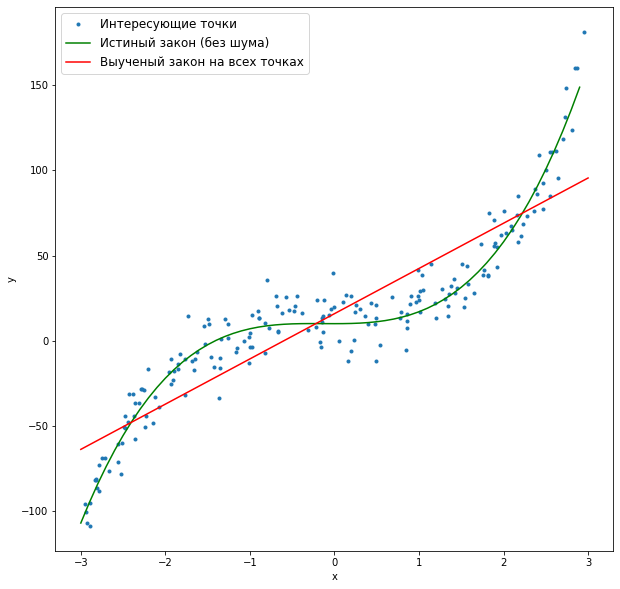

In [ ]:
m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 5 * X**3 + 2 * X**2 + 10 + np.random.randn(m, 1)*12

X_poly = np.c_[np.ones((m, 1)), X, X**2, X**3]
X_b = np.c_[np.ones((m, 1)), X]

x_for_poly = np.arange(-3,3,0.1)
x_for_line = np.array([-3,3])
true_poly = 5 * x_for_poly**3 + 2 * x_for_poly**2 + 10

theta_pred = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
#theta_pred = (theta_pred.T)[0]
pred_line = theta_pred[0] + theta_pred[1]*x_for_line 

fig = plt.figure(figsize=(10,10))
plt.plot(X,y, '.', label='Интересующие точки')
plt.plot(x_for_poly, true_poly, 'g-', label='Истиный закон (без шума)')
plt.plot(x_for_line, pred_line, 'r-', label='Выученый закон на всех точках')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 6. Переобучение (overfitting)


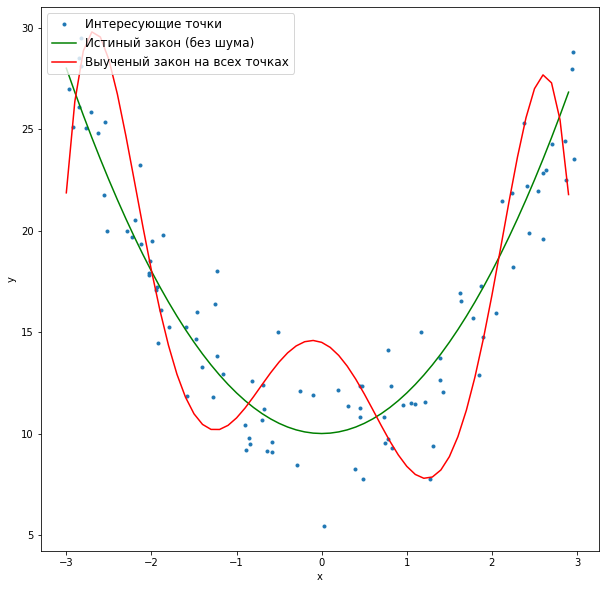

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 * X**2 + 10 + np.random.randn(m, 1)*2

shuffled_indices = np.random.permutation(X.shape[0])[:10]

X_s = X[shuffled_indices]
y_s = y[shuffled_indices]

x_for_poly = np.arange(-3,3,0.1)
true_poly = 2 * x_for_poly**2 + 10

X_poly_6 = np.c_[np.ones((shuffled_indices.shape[0], 1)), X_s, X_s**2, X_s**3, X_s**4, X_s**5, X_s**6]

theta_pred = np.linalg.inv(X_poly_6.T.dot(X_poly_6)).dot(X_poly_6.T).dot(y_s)
theta_pred = (theta_pred.T)[0]
pred_poly = (np.c_[np.ones(
    (x_for_poly.shape[0], 1)), x_for_poly, x_for_poly**2, 
    x_for_poly**3, x_for_poly**4, x_for_poly**5, x_for_poly**6
    ]).dot(np.expand_dims(theta_pred, -1))

fig = plt.figure(figsize=(10,10))
plt.plot(X,y, '.', label='Интересующие точки')
plt.plot(x_for_poly, true_poly, 'g-', label='Истиный закон (без шума)')
plt.plot(x_for_poly, pred_poly, 'r-', label='Выученый закон на всех точках')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left", fontsize=12)
plt.show()

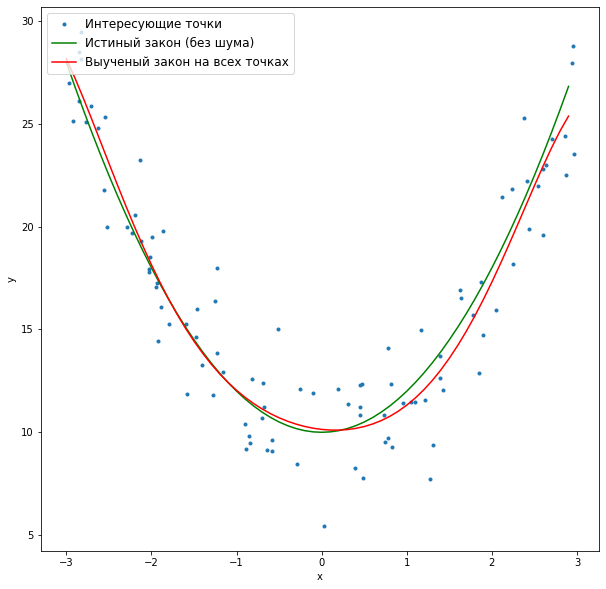

In [ ]:
X_poly_6 = np.c_[np.ones((m, 1)), X, X**2, X**3, X**4, X**5, X**6]

theta_pred = np.linalg.inv(X_poly_6.T.dot(X_poly_6)).dot(X_poly_6.T).dot(y)
theta_pred = (theta_pred.T)[0]
pred_poly = (np.c_[np.ones(
    (x_for_poly.shape[0], 1)), x_for_poly, x_for_poly**2, 
    x_for_poly**3, x_for_poly**4, x_for_poly**5, x_for_poly**6
    ]).dot(np.expand_dims(theta_pred, -1))

fig = plt.figure(figsize=(10,10))
plt.plot(X,y, '.', label='Интересующие точки')
plt.plot(x_for_poly, true_poly, 'g-', label='Истиный закон (без шума)')
plt.plot(x_for_poly, pred_poly, 'r-', label='Выученый закон на всех точках')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Испытания и проверка

### Ошибка обобщения

$$
E_g = E_S + E_D + E_N
$$